<a href="https://colab.research.google.com/github/michellamello/mackenzie/blob/main/plpcd4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade trilha 4 - Utilização de celulares pelo mundo

Para a execução deste trabalho, busquei nos bancos de dados GAPMINDER a população total por ano e a quantidade de aparelhos de telefone celular no período de 1999 a 2019 mundialmente.

## Importação de bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

%matplotlib inline

## Leitura de CSVs e exibição de resultados iniciais

In [ ]:
population = pd.read_csv('population_total.csv')
cell_phones = pd.read_csv('cell_phones_total.csv')

display(population.head())
display(cell_phones.head())

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M,22.7M
2,Angola,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M,14.6M
3,Albania,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M,2.62M
4,Andorra,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k,NaN


## Limpeza de anos desnecessários (mantidos 1999 a 2019)

In [ ]:
pop_tmp = population.drop(population.iloc[:, 1:201], axis=1)
pop_final = pop_tmp.drop(pop_tmp.iloc[: , 22:], axis=1)

,country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,20.8M,21.6M,22.6M,23.7M,24.7M,25.7M,26.4M,27.1M,27.7M,...,30.1M,31.2M,32.3M,33.4M,34.4M,35.4M,36.3M,37.2M,38M,38.9M
1,Angola,16.4M,16.9M,17.5M,18.1M,18.8M,19.4M,20.1M,20.9M,21.7M,...,24.2M,25.1M,26M,26.9M,27.9M,28.8M,29.8M,30.8M,31.8M,32.9M
2,Albania,3.13M,3.13M,3.13M,3.12M,3.1M,3.09M,3.06M,3.03M,3M,...,2.93M,2.91M,2.9M,2.9M,2.89M,2.89M,2.88M,2.88M,2.88M,2.88M
3,Andorra,65.4k,67.3k,70k,73.2k,76.3k,78.9k,81k,82.7k,83.9k,...,83.7k,82.4k,80.8k,79.2k,78k,77.3k,77k,77k,77.1k,77.3k
4,United Arab Emirates,3.13M,3.3M,3.48M,3.71M,4.07M,4.59M,5.3M,6.17M,7.09M,...,8.95M,9.14M,9.2M,9.21M,9.26M,9.36M,9.49M,9.63M,9.77M,9.89M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,174k,175k,176k,177k,179k,180k,181k,182k,183k,...,187k,189k,191k,192k,194k,195k,195k,196k,197k,198k
193,Yemen,17.4M,17.9M,18.4M,19M,19.5M,20.1M,20.7M,21.3M,21.9M,...,23.8M,24.5M,25.1M,25.8M,26.5M,27.2M,27.8M,28.5M,29.2M,29.8M
194,South Africa,45M,45.6M,46.2M,46.7M,47.3M,47.9M,48.5M,49.1M,49.8M,...,52M,52.8M,53.7M,54.5M,55.4M,56.2M,57M,57.8M,58.6M,59.3M
195,Zambia,10.4M,10.7M,11M,11.3M,11.6M,11.9M,12.2M,12.5M,12.8M,...,14M,14.5M,14.9M,15.4M,15.9M,16.4M,16.9M,17.4M,17.9M,18.4M


In [ ]:
cell_int = cell_phones.drop(cell_phones.iloc[:, 1:41], axis=1)

## Busca por valores em branco em ambas as tabelas. Se encontrado, a linha foi desconsiderada

In [ ]:
display(pop_final.isnull().sum())

country    0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
dtype: int64

In [ ]:
display(cell_int.isnull().sum())

country     0
1999        9
2000        9
2001        8
2002        8
2003        7
2004       10
2005       13
2006       10
2007       12
2008       10
2009        7
2010       11
2011        7
2012       10
2013        9
2014        7
2015       12
2016       10
2017       31
2018       45
2019       68
dtype: int64

In [ ]:
cell_final = cell_int.dropna(how='any')

cell_final.head()

,country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Afghanistan,0,0,25k,200k,600k,1.2M,2.52M,4.67M,7.9M,...,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M,22.7M
2,Angola,25.8k,75k,140k,350k,740k,1.61M,3.05M,4.96M,6.77M,...,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M,14.6M
3,Albania,29.8k,393k,851k,1.1M,1.26M,1.53M,1.91M,2.32M,1.86M,...,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M,2.62M
5,United Arab Emirates,1.43M,1.91M,2.43M,2.97M,3.68M,4.53M,5.52M,7.73M,9.36M,...,11.7M,13.8M,16.1M,16.8M,17.9M,19.9M,19.8M,20.1M,19.6M,18.4M
6,Argentina,6.49M,6.74M,6.57M,7.84M,13.5M,22.2M,31.5M,40.4M,46.5M,...,60.7M,64.3M,67.4M,61.2M,61.8M,63.7M,61.9M,58.6M,56.4M,54.8M


## Preparação de dados para operações matemáticas e estatísticas.

In [ ]:
for col, values in pop_final.iloc[: , 1:].iteritems():
  pop_final[col] = pop_final[col].replace({'k': 'e+03', 'M': 'e+06', 'B': 'e+09'}, regex=True).astype(float).astype(int)

for col, values in cell_final.iloc[: , 1:].iteritems():
  cell_final[col] = cell_final[col].replace({'k': 'e+03', 'M': 'e+06', 'B': 'e+09'}, regex=True).astype(float).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Somando colunas para totalizar população e quantidade de celulares por ano

In [ ]:
pop_x = []
pop_y = []
cell_x = []
cell_y = []

for col in pop_final.iloc[: , 1:]:
  pop_x.append(col)
  pop_y.append(pop_final[col].sum())

for col in cell_final.iloc[: , 1:]:
  cell_x.append(col)
  cell_y.append(cell_final[col].sum())

## **Pergunta 1:** O iPhone foi um divisor de águas no acesso aos celulares pela população mundial?

Text(2008, 2000000000, 'Lançamento iPhone')

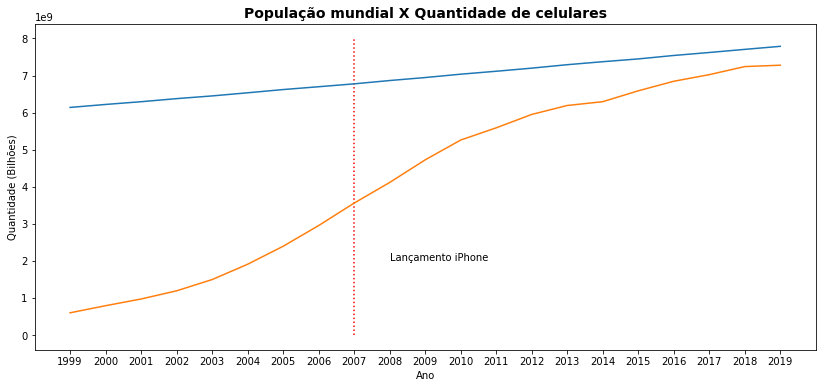

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(pop_x, pop_y)
ax.plot(cell_x, cell_y)

ax.set_title('População mundial X Quantidade de celulares', fontsize=14, weight='bold')
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade (Bilhões)')

plt.vlines('2007', 0, 8000000000, color='r', linestyles=':')
plt.text('2008', 2000000000, 'Lançamento iPhone')

**Resposta:** De acordo com a análise dos dados, nota-se que o lançamento do aparelho se encontra quase que exatamente na metade da curva de aumento de adoção. Nota-se ainda que o início da explosão no uso ocorreu alguns anos antes, em 2004/ 2005, que corresponde ao início da implantação da tecnologia 3G em alguns países. No entanto, para confirmar essa última hipótese, seria necessário avaliar a curva por país.

# **Pergunta 2:** Qual foi a evolução da adoção dos telefones celulares no planeta?

In [ ]:
dados = {'ano': pop_x,'populacao': pop_y,'celulares': cell_y}

df = pd.DataFrame(dados)

df['razao'] = (df['celulares'] / df['populacao']) * 100
dif = []

cont = 1
diferenca = 0

for i, row in df.iterrows():
  dif_tmp = row['razao'] - diferenca
  dif.append(dif_tmp)
  diferenca += dif_tmp

  cont += 1

df['diferenca'] = dif

df['populacao'] = df['populacao'].apply(lambda x: x / 1000000000)
df['celulares'] = df['celulares'].apply(lambda x: x / 1000000000)

df.head(21)

,ano,populacao,celulares,razao,diferenca
0,1999,6.139172,0.598441,9.747906,9.747906
1,2000,6.219679,0.789708,12.696920,2.949014
2,2001,6.293687,0.971029,15.428614,2.731693
3,2002,6.376656,1.191589,18.686739,3.258125
4,2003,6.449838,1.494871,23.176876,4.490137
5,2004,6.534379,1.908509,29.207189,6.030313
6,2005,6.621488,2.393479,36.147143,6.939954
7,2006,6.697621,2.952267,44.079345,7.932202
8,2007,6.775481,3.558586,52.521519,8.442174
9,2008,6.865123,4.114730,59.936724,7.415205


** Resposta:** A tabela acima demonstra a enorme explosão na adoção de celulares no período avaliado, partindo de pouco menos de 10% da população mundial em 1999 para quase 94% em 2018 (pico de adoção).Demonstra também que o maior aumento ocorreu exatamente em 2007, reforçando a conclusão da resposta acima e complementando a informação passada pelo gráfico, que também demonstra que desde então a curva vem arrefecendo até o ano de 2014, onde houve aumento quase zero. É interessante notar também que, desde o início da análise, apenas em 2019 houve retração, o que pode gerar duas hipóteses para análises futuras:


1.   Houve estagnação devido ao fato de que a parcela da população que possui poder de compra para adquirir um aparelho já o fez e agora apenas o substitui periodicamente
2.   A estagnação e redução no volume de compras pode ter sido uma das responsáveis pelo aumento no ticket médio dos novos aparelhos



# **Pergunta 3** - Quais os 5 países com maior adoção de telefones celulares per capita em *2019*?

In [ ]:
pop_final = pop_final.drop(pop_final.iloc[: , 1:21], axis=1)
cell_final = cell_final.drop(cell_final.iloc[:, 1:21], axis=1)

pop_final = pop_final.set_index('country')
cell_final = cell_final.set_index('country')

df_concat = pd.concat([cell_final, pop_final], axis=1)
df_concat = df_concat.dropna(how='any')

df_concat.columns = ['celulares', 'populacao']

df_concat['razao'] = (df_concat['celulares'] / df_concat['populacao'])

display(df_concat.loc[df_concat['razao'].nlargest(10).index])

,celulares,populacao,razao
country,,,
"Hong Kong, China",21900000.0,7500000.0,2.920000
Seychelles,183000.0,98300.0,1.861648
United Arab Emirates,18400000.0,9890000.0,1.860465
Lithuania,4740000.0,2720000.0,1.742647
Thailand,116000000.0,69800000.0,1.661891
Russia,239000000.0,146000000.0,1.636986
Botswana,3820000.0,2350000.0,1.625532
South Africa,96000000.0,59300000.0,1.618887
Kuwait,6770000.0,4270000.0,1.585480


**Resposta:** A tabela nos demonstra que nos 10 países com a maior quantidade de celulares per-capita, a razão ultrapassa um celular por pessoa, chegando a quase três em Hong Kong.

# **Pergunta 4** Quais os 10 países com o menor número de celulares per capita em 2019?

In [ ]:
display(df_concat.loc[df_concat['razao'].nsmallest(10).index])

,celulares,populacao,razao
country,,,
Djibouti,434000.0,988000.0,0.439271
Angola,14600000.0,32900000.0,0.443769
"Congo, Dem. Rep.",40800000.0,89600000.0,0.455357
Kiribati,54700.0,119000.0,0.459664
Malawi,10000000.0,19100000.0,0.523560
Chad,8690000.0,16400000.0,0.529878
Comoros,473000.0,870000.0,0.543678
Burundi,6630000.0,11900000.0,0.557143
Afghanistan,22700000.0,38900000.0,0.583548


**Resposta:** Entre os países com a menor quantidade de celulares per capita em 2019, a razão é de aproximadamente um celular para cada duas pessoas.